In [1]:
pdl_coin = """
defs:
  p:
    model: ollama_chat/granite3.2:2b
    input: Generate a number between 0 and 1 that represents the bias of a coin that might returns head more often than tail. For example, a valid response is 0.75. DO NOT GENERATE A PYTHON CODE, ANSWER WITH A SINGLE NUMBER.
    parser: json
data:
  - ${p}
"""

with open("pdl_coin.pdl", "w") as f:
    f.write(pdl_coin)

100%|██████████| 30/30 [00:02<00:00, 13.40it/s]


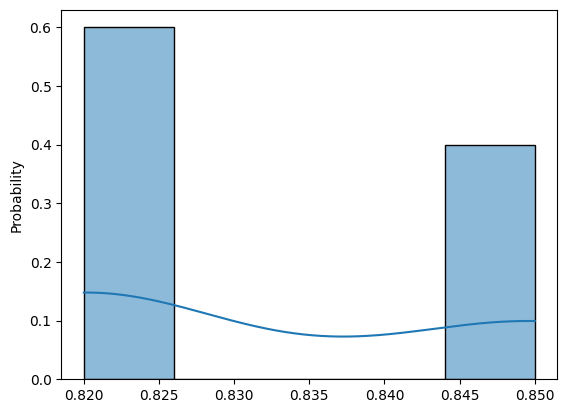

In [2]:
from mu_ppl import *
import matplotlib.pyplot as plt


def coin(obs: list[int]):
    p = sample(PDL("./pdl_coin.pdl"), name="p")[0]
    for yi in obs:
        observe(Bernoulli(p), yi)
    return p


with MetropolisHastings(num_samples=10, warmups=10, thinning=2):
    dist1: Empirical[float] = infer(coin, [0, 0, 1, 0])  # type: ignore
    # print(dist1.stats())
    viz(dist1)
    plt.show()
